# Information Gain Computation Example 

### Import

In [2]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm
from matplotlib.colors import LogNorm
from sklearn import mixture
from mpl_toolkits import mplot3d

### Create two distributions that are separated along one dimension only
To demonstrate how to compute the gini impurity and use it to find the best split, we first create an artificial data set. The dataset has two classes and two features, one of which shows a clear shift between the the classes, the other does not. 

In [3]:
mu_1 = np.array([+2,0])
mu_2 = np.array([-2,0])
sigma_1 = np.array([[3,0],[0,10]]) * 0.25
sigma_2 = np.array([[3,0],[0,10]]) * 0.25

### Create a sampling of 100 data points from each distribution and combine
A random sampling from these two distributions gives us a well defined dataset for which one feature can be used to split the data, the other cannot. 

In [4]:
no_points = 100
gridsize = 101
rv_1 = mnorm(mu_1,sigma_1)
rv_2 = mnorm(mu_2,sigma_2)
X1 = rv_1.rvs(no_points)
X2 = rv_2.rvs(no_points)
X = np.vstack((X1,X2))
y = np.vstack((np.zeros((100,1)),np.ones((100,1))))
classes = np.unique(y)
no_classes = len(classes)

### Plot Data and underlying distribution
Notice again that splitting on feature 1 will give us high classification accuracy already, where feature 2 does not.

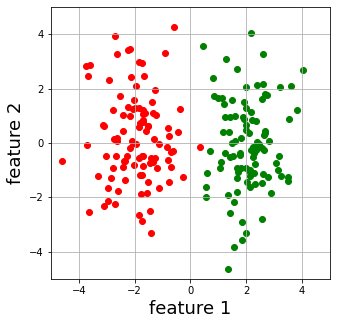

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X1[:,0],X1[:,1],c='g')
plt.scatter(X2[:,0],X2[:,1],c='r')
plt.grid()
plt.axis((-5,5,-5,5))
plt.xlabel('feature 1',fontsize=18)
plt.ylabel('feature 2',fontsize=18)
plt.savefig('../../assets/figures/15_gini_1.png');

### Compute Information Gain
As an alternative to Gini impurity, we can also use information gain as a metric to decide where to split. Information gain is defined as the decrease in entropy for a particular split, compared to no split. We thus compute entropy for the data at our current node, and loop through every possible split of this data based on the values of a feature. If the resulting average entropy of the split (left and right entropies combined) is lower than our current entropy, we have gain informated by this split. If the amount of information gained for this feature is the lowest across all available features, we will use it to split the data. 

In [6]:
def compute_entropy(y,classes):

    #Compute
    entropy = 0
    classes = np.unique(y)
    no_classes = len(classes)
    for i in range(no_classes):
        prob = len(np.where(classes[i] == y)[0]) / len(y)
        if (prob > 0.0):
            entropy = entropy + (prob * np.log2(prob))

    #Return
    return -entropy

### Find Best Split
To find the best split for a specific feature, we sort the data for that feature. We then loop through all possible way of dividing the data and compute the gini for the subset of data left and right of the current threshold. 

In [7]:
def find_best_split(x,y,classes):
    
    #Compute
    output = []
    classes = np.unique(y)
    no_classes = len(classes)
    indx = np.argsort(x)
    x_sorted = x[indx]
    y_sorted = y[indx]
    for i in range(len(y_sorted)-1):
        entropy_left = compute_entropy(y_sorted[:i+1],classes)
        entropy_right = compute_entropy(y_sorted[i:],classes)
        entropy_average = (entropy_left + entropy_right)/no_classes
        information_gain = current_entropy - entropy_average
        threshold = (x_sorted[i] + x_sorted[i+1])/2
        output.append((entropy_left,entropy_right,information_gain,threshold))
    output = np.array(output)
    best_threshold_idx = np.argmax(output[:,2])
    best_threshold = output[best_threshold_idx,3]
    
    #Return
    return best_threshold_idx, best_threshold, output

### Compute the Gini Impurity for the whole data set

In [8]:
current_entropy = compute_entropy(y,classes)

### Compute Gini Coefficients Along Both dimensions

In [9]:
threshold_idx1, threshold1, output1 = find_best_split(X[:,0],y[:,0],classes)
threshold_idx2, threshold2, output2 = find_best_split(X[:,1],y[:,0],classes)

### Plot the Entropies
Similar to how we plotted the gini impurities in 015.0, we can plot the entropy for both features, and all possible thresholds

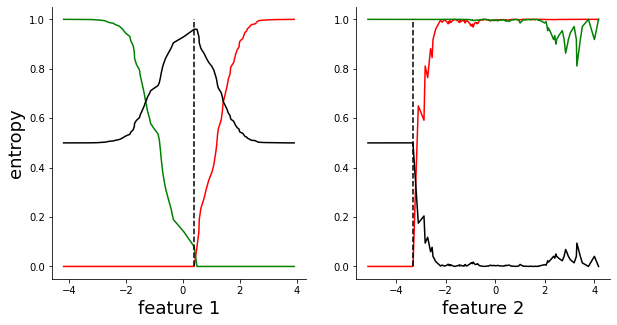

In [10]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
plt.plot(output1[:,3],output1[:,0],'r');
plt.plot(output1[:,3],output1[:,1],'g');
plt.plot(output1[:,3],output1[:,2],'k');
plt.plot([threshold1,threshold1],[0,1.0],'k--');
plt.xlabel('feature 1',fontsize=18)
plt.ylabel('entropy',fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax = plt.subplot(1,2,2)
plt.plot(output2[:,3],output2[:,0],'r');
plt.plot(output2[:,3],output2[:,1],'g');
plt.plot(output2[:,3],output2[:,2],'k');
plt.plot([threshold2,threshold2],[0,1.0],'k--');
plt.xlabel('feature 2',fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('../../assets/figures/15_entropy_2.png');